In [1]:
import sys

In [2]:
sys.version

'3.6.7 (default, Oct 25 2018, 09:16:13) \n[GCC 5.4.0 20160609]'

In [61]:
import sys
import copy
import os
import numpy as np
import pandas
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.datasets import mnist
from keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, AveragePooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook

print(tf.__version__)

1.12.0


In [62]:
PATH_TO_SOURCES = '/home/yakaboskic/src/'
MODULE_FOLDER_NAMES = ['Design-of-experiment-Python']

for module in MODULE_FOLDER_NAMES:
    mod_path = os.path.join(PATH_TO_SOURCES, module)
    if not sys.path.__contains__(mod_path):
        sys.path.append(mod_path)
    
import DOE_functions
import seaborn as sns

In [63]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [64]:
batch_1_path = 'data/cifar-10-batches-py/data_batch_1'
dict_1 = unpickle(batch_1_path)

In [65]:
x_train = copy.deepcopy(dict_1[b'data'])/255.0
y_train = np.array(copy.deepcopy(dict_1[b'labels']))

In [66]:
x_train = x_train.reshape(10000, 32, 32, 3)
x_train.shape[1:]

(32, 32, 3)

In [20]:
#-- Build CNN Model
model_cnn = Sequential()
model_cnn.add(Conv2D(input_shape= x_train[0].shape, 
                                  filters=32, 
                                  kernel_size=(10,10), 
                                  strides = (1,1),
                                  padding='Same', 
                                  activation='relu'))

model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(filters=64, 
                                  kernel_size=(3,3), 
                                  padding='Same', 
                                  activation='relu'))

model_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(filters=64, 
                                  kernel_size=(5,5), 
                                  padding='Same', 
                                  activation='relu'))

model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

In [21]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 4, 4, 32)          896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 64)          102464    
__________

In [22]:
# Python optimisation variables
epochs = 20
batch_size = 50

#-- Set up the Optimizer
optimizer = tf.train.AdamOptimizer()

In [23]:
#-- Compile the Model
model_cnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history_cnn = model_cnn.fit(x_train, y_train, 
                            batch_size=batch_size, 
                            epochs=epochs)

Epoch 1/20
10000/10000 [==============================] - 1s 126us/step - loss: 2.2288 - acc: 0.1510
Epoch 2/20
10000/10000 [==============================] - 1s 100us/step - loss: 2.1446 - acc: 0.1770
Epoch 3/20
10000/10000 [==============================] - 1s 99us/step - loss: 2.1034 - acc: 0.2074
Epoch 4/20
10000/10000 [==============================] - 1s 99us/step - loss: 2.0650 - acc: 0.2273
Epoch 5/20
10000/10000 [==============================] - 1s 100us/step - loss: 2.0472 - acc: 0.2350
Epoch 6/20
10000/10000 [==============================] - 1s 99us/step - loss: 2.0310 - acc: 0.2448
Epoch 7/20
10000/10000 [==============================] - 1s 112us/step - loss: 2.0227 - acc: 0.2487
Epoch 8/20
10000/10000 [==============================] - 1s 113us/step - loss: 2.0100 - acc: 0.2550
Epoch 9/20
10000/10000 [==============================] - 1s 113us/step - loss: 1.9993 - acc: 0.2632
Epoch 10/20
   50/10000 [..............................] - ETA: 1s - loss: 1.9255 - acc: 0.300

KeyboardInterrupt: 

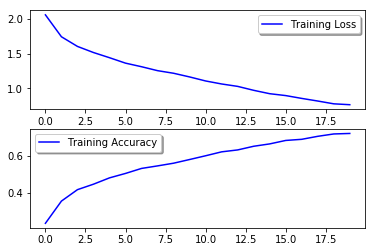

In [70]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_cnn.history['loss'], color='b', label='Training Loss')
#ax[0].plot(history_cnn.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend= ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_cnn.history['acc'], color='b', label='Training Accuracy')
#ax[1].plot(history_cnn.history['val_acc'], color='r', label='Validation Accuracy')
legend= ax[1].legend(loc='best', shadow=True)

In [73]:
test_batch_path = 'data/cifar-10-batches-py/test_batch'
dict_test = unpickle(test_batch_path)
x_test = copy.deepcopy(dict_test[b'data'])/255.0
y_test = np.array(copy.deepcopy(dict_test[b'labels']))
x_test = x_test.reshape(10000, 32, 32, 3)

In [72]:
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print(test_loss, test_acc)

10000/10000 [==============================] - 4s 410us/step
1.343236236190796 0.5655


In [76]:
dict_values = {'conv_filters1': [10,80],
              'conv_kernelSize1': [2,10],
              'conv_strides1': [1,10],
              'conv_activation1': [1,2,3],
              #'conv_filters2': [10,80],
              #'conv_kernelSize2': [2,10],
              #'conv_strides2': [1,10],
              #'conv_activation2': [1,2,3],
              #'conv_filters3': [10,80],
              #'conv_kernelSize3': [2,10],
              #'conv_strides3': [1,10],
              #'conv_activation3': [1,2,3],
              'pool_type1': [1,2,3],
              'pool_size1': [2,10],
              'pool_strides1': [1, 10],
              'pool_momentum1': [.5, .95],
              #'pool_type2': [1,2,3],
              #'pool_size2': [2,10],
              #'pool_strides2': [1, 10],
              #'pool_momentum2': [.5, .95],
              #'pool_type3': [1,2,3],
              #'pool_size3': [2,10],
              #'pool_strides3': [1, 10],
              #'pool_momentum3': [.5, .95],
              'drop_value1': [0, .5],
              #'drop_value2': [0, .5],
              #'drop_value3': [0, .5],
              'dense_num' : [100, 1000]}


doe = DOE_functions.build_central_composite(dict_values, face='ccf')

conv_activation1 had more than two levels. Assigning the end point to the high level.
pool_type1 had more than two levels. Assigning the end point to the high level.


In [77]:
(item1, item2) = doe.loc[0,['conv_filters1', 'dense_num']]

In [68]:
doe.to_csv()

,conv_filters1,conv_kernelSize1,conv_strides1,conv_activation1,pool_type1,pool_size1,pool_strides1,pool_momentum1,drop_value1,dense_num
0,10.0,2.0,1.0,1.0,1.0,2.0,1.0,0.500,0.00,100.0
1,80.0,2.0,1.0,1.0,1.0,2.0,1.0,0.500,0.00,100.0
2,10.0,10.0,1.0,1.0,1.0,2.0,1.0,0.500,0.00,100.0
3,80.0,10.0,1.0,1.0,1.0,2.0,1.0,0.500,0.00,100.0
4,10.0,2.0,10.0,1.0,1.0,2.0,1.0,0.500,0.00,100.0
5,80.0,2.0,10.0,1.0,1.0,2.0,1.0,0.500,0.00,100.0
6,10.0,10.0,10.0,1.0,1.0,2.0,1.0,0.500,0.00,100.0
7,80.0,10.0,10.0,1.0,1.0,2.0,1.0,0.500,0.00,100.0
8,10.0,2.0,1.0,3.0,1.0,2.0,1.0,0.500,0.00,100.0
9,80.0,2.0,1.0,3.0,1.0,2.0,1.0,0.500,0.00,100.0


In [74]:
act_map = {1:'sigmoid', 2:'relu', 3:'tanh'}
batch_size = 100
epochs = 20
results = []

for test in range(0, 1): #doe.shape[0]):
    try:
        (conv_filter,
         kernel_size,
         conv_stride,
         activition,
         pool_type,
         pool_size,
         pool_stride,
         pool_momentum,
         drop_value,
         dense_num) = doe.loc[test,:]

        if pool_type == 1:
            pool_layer = MaxPool2D(padding='Same',
                                   strides= (round(pool_size), round(pool_size)),
                                   pool_size=(round(pool_size), round(pool_size)))
        elif pool_type == 2:
            pool_layer = AveragePooling2D(padding='Same',
                                   strides= (round(pool_size), round(pool_size)),
                                   pool_size=(round(pool_size), round(pool_size)))
        else:
            pool_layer = BatchNormalization(momentum=pool_momentum)

        conv_layer1 = Conv2D(round(conv_filter),
                         input_shape = x_train[0].shape,
                         activation= act_map[activition],
                         kernel_size = (round(kernel_size), round(kernel_size)),
                         padding='Same',
                         strides = (round(conv_stride), round(conv_stride)))
        conv_layer = Conv2D(round(conv_filter),
                         activation= act_map[activition],
                         kernel_size = (round(kernel_size), round(kernel_size)),
                         padding='Same',
                         strides = (round(conv_stride), round(conv_stride)))


        model = Sequential()
        model.add(conv_layer1)
        model.add(pool_layer)
        model.add(Dropout(drop_value))
        model.add(conv_layer)
        model.add(pool_layer)
        model.add(Dropout(drop_value))
        model.add(conv_layer)
        model.add(Flatten())
        model.add(Dense(int(dense_num), activation='relu'))
        model.add(Dropout(drop_value))
        model.add(Dense(10, activation='softmax'))

        model.summary()

        model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(x_train, y_train, 
                                batch_size=batch_size, 
                                epochs=epochs)
        result_loss, result_acc = model.evaluate(x_test, y_test)

        results.append((result_loss, result_acc))
    except Exception,e:
        results.append(e)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 10)        130       
_________________________________________________________________
max_pooling2d_17 (MaxPooling multiple                  0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 10)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           multiple                  410       
_________________________________________________________________
dropout_23 (Dropout)         (None, 8, 8, 10)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               64100     
__________

In [75]:
results

[(2.302966154098511, 0.1)]